In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Load the Dataset
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
#  Clean and Preprocess Data
# Drop rows where 'Rating' is missing
df = df.dropna(subset=['Rating'])

# Convert 'Duration' from "123 min" to just number
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Drop rows with remaining missing values
df.dropna(inplace=True)

# Label encode categorical columns
le = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = le.fit_transform(df[col])


In [ ]:
# Split Features and Target
X = df[['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert 'Year' to numeric, extracting the year as integer
X_train['Year'] = X_train['Year'].str.extract(r'(\d{4})').astype(int)
X_test['Year'] = X_test['Year'].str.extract(r'(\d{4})').astype(int)

In [ ]:
# Train the Model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)


MSE: 1.571351890459364
MAE: 0.9836201413427562


In [ ]:
# Evaluate the Model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 1.2535357555568025
Mean Absolute Error (MAE): 0.9836201413427562


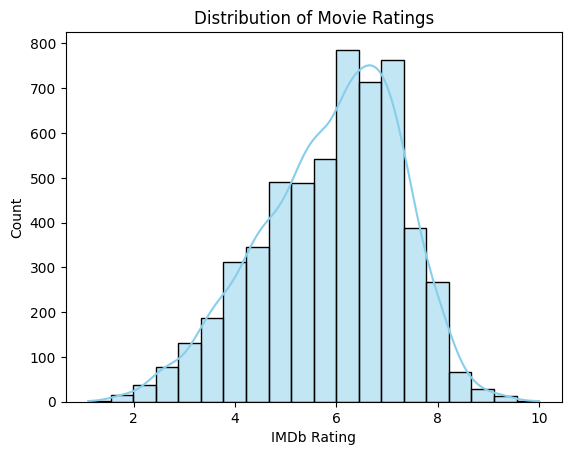

In [ ]:
# Distribution of Ratings
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18756\3595015489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


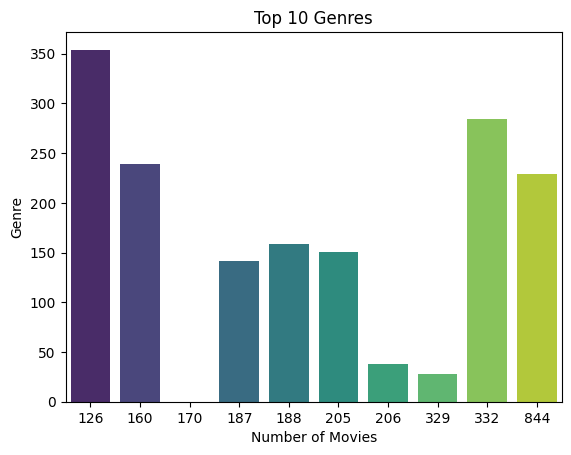

In [ ]:
# Top 10 Most Common Genres
top_genres = df['Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


In [ ]:
# Final Summary
# Built a movie rating prediction model using Random Forest Regressor.
# Encoded categorical features: Genre, Director, Actor 1, Actor 2, Actor 3.
# Used Year and Duration as numerical features.
# RMSE and MAE helped evaluate prediction accuracy.
# You can improve it further by using one-hot encoding or adding more features like number of votes. 